# Mandatory Assignment 2: Sampling Customers

**This is the second of three mandatory assignments to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The assignment is to be done individually. You are under no circumstances allowed to collaborate with anyone on solving the exercises (cf. the full policy on this on the course website)**
- **You must hand in one Jupyter notebook (this notebook) with your solution**
- **The hand-in of the notebook is due 2019-11-10, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python**
- **You may use more cells than the provided ones for your answers**
- **You should not remove the problem statements**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**

---
## Introduction
When computing group aggregates from a sample, simple random sampling does not give good results. Instead, a representative sample can be obtained by storing each record seen from a sample of the elements we group by. 

In this assignment you should implement this sampling method on a stream of customer spendings.

### Example
Suppose you are sampling from a stream of customer spendings. Each element of the stream consists of a customer ID and an amount. For example:

`123e4567-e89b-12d3-a456-426655440000 29.99`

To obtain a representative sample, you should sample some customer IDs and make sure that every occurrence of the sampled customer IDs are in your final sample. For example, if the customer ID `123e4567-e89b-12d3-a456-426655440000` is among the sampled customer IDs, every element with this ID should be in your sample. 

## Reading the stream
The following code reads a remote file line by line. It is wrapped in a generator to make it easier to extend. You should design your algorithm to read from the generator as a stream. You may extend or modify this to fit your requirements.

In [2]:
import urllib

def stream(n):
    i=0
    with urllib.request.urlopen('https://files.dtu.dk/fss/public/link/public/stream/read/spending?linkToken=wkMPLdtDDyvQQw8o&itemName=spending') as f:
        for line in f:
            element = line.rstrip().decode("utf-8")
            yield element
            i = i+1
            if i==n:
                break

In [3]:
import numpy as np

In [51]:
STREAM_SIZE = 100000
customer_stream = stream(STREAM_SIZE)

## Exercise 1
Implement an algorithm that computes a sample from the stream. The sample must be representative of customers, i.e., you should be able to answer group aggregate questions from it.

The sample size should be approximately 10% of the number of elements read from the stream.

It is important that your algorithm is a streaming algorithm. This means that your algorithm should update the sample every time an element from the stream is processed, and you should also only process the stream once.

### Hints
Hint 1: Since simple random sampling is not a good idea, you should not use the reservoir sampling algorithm.

Hint 2: The sample does not have to be exactly $k$ elements.

Hint 3: You should use a hash function and the fact that it can be used to uniformly map elements from a large universe to a smaller domain. Murmurhash3 (`mmh3`) is a suitable hash function from strings to integers for this.

In [28]:
user_dictionary = {}
import mmh3
for i,l in enumerate(customer_stream):
    if l.split()[0] in user_dictionary.keys():
        user_dictionary[l.split()[0]].append(l.split()[1])
    else:
        hash_number = mmh3.hash(l.split()[0],seed = 42)
        if hash_number%10 ==1:
            user_dictionary[l.split()[0]] = [l.split()[1]]



## Exercise 2
Use the sample obtained in the previous exercise to answer the following question.

- What is the average spending per customer?

In [29]:
total = 0
num = 0
for l in user_dictionary.keys():
    #num = num + len(user_dictionary[l])
    temp = list(map(float,user_dictionary[l] ))
    total = total +  sum(temp)
predicted_avg = total/len(list(user_dictionary.keys()))
print("Average total spending per customer is "+str(total/len(list(user_dictionary.keys()))))
    

Average total spending per customer is 14113.42208955224


## Errror from true value

In [30]:
true_dict = {}
customer_stream = stream(STREAM_SIZE)
for i,l in enumerate(customer_stream):
    if l.split()[0] in true_dict:
        true_dict[l.split()[0]].append(float(l.split()[1]))
    else:
        true_dict[l.split()[0]] = [float(l.split()[1])]

In [31]:
total = 0
num = 0
for l in true_dict.keys():
    #num = num + len(user_dictionary[l])
    temp = list(map(float,true_dict[l] ))
    total = total +  sum(temp)
true_avg = total/len(list(true_dict.keys()))
print("Average total true spending per customer is "+str(total/len(list(true_dict.keys()))))

Average total true spending per customer is 13678.283997271494


In [37]:
print("Error in prediction when used user representative sample :{}".format(100*abs((predicted_avg-true_avg)/(true_avg))))

Error in prediction when used user representative sample :3.181233057944592


#### Distribution of total spendings of each customer in the sample using Representative sampling

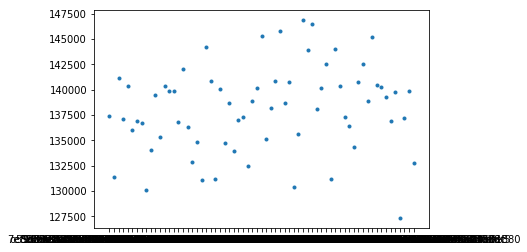

In [41]:
new_user_dict = {}
for l in user_dictionary.keys():
    temp = list(map(float,user_dictionary[l] ))
    no_of_transac = len(temp)
    new_user_dict[l] = sum(temp)

import matplotlib.pyplot as plt
plt.plot(*zip(*new_user_dict.items()),".")
plt.show()


## Exercise 3
Explain why simple random sampling would not give as good an answer to the question in exercise 2 as your new algorithm does.

Hint: Look at the distribution of amounts for some customer in your sample.

#### Random sampling Implementaion

In [61]:
customer_stream = stream(STREAM_SIZE)

In [62]:
import random
user_list = {}
#random sampling
for i,l in enumerate(customer_stream):
    if random.randint(0,10) == 0:
        if l.split()[0] in user_list.keys():
            user_list[l.split()[0]].append(float(l.split()[1]))
        else:
            user_list[l.split()[0]] = [float(l.split()[1])]

In [63]:
new_user_list = {}
for l in user_list.keys():
    #temp = list(map(float,user_dictionary[l] ))
    #no_of_transac = len(temp)
    new_user_list[l] = sum(user_list[l])

#### Plot of Distribution of each user spending from Random Sampling

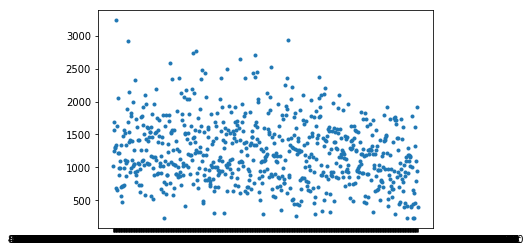

In [64]:
import matplotlib.pyplot as plt

plt.plot(*zip(*new_user_list.items()),".")
plt.show()

In [65]:
num =0
total = 0
for l in user_list.keys():
    num = num + len(user_list[l])
    temp = len(user_list[l])
    #temp2 = list(map(float,user_dictionary[l] ))
    total = total +  sum(user_list[l])
print(total/len(list(user_list.keys())))

1234.1933424283764


In [57]:
print("Error in prediction when used random sample :{}".format(100*abs((random_avg-true_avg)/(true_avg))))

Error in prediction when used random sample :90.7013657422903


#### Random Sampling vs Algorithm in 2

Average total spending per customer is $\frac{\Sigma(spendings)}{\Sigma No. of Users}$

We need to calculate the average total spending of a customer. Here we need to store 10% of data. So,clearly we need the 10% data which is implicated to have information of 10% users which useful to calculate total spending per customer. If we randomly sample the data we are colecting 10% data which would help to calculate average spending per transaction irrespective of the user.So,This is why representative sampling using users is better than that of random sampling. Also the variance obtained using user represetative sample is from the difference in the spendings(which is real variance) but the variance obtained through random sampling is due to not collecting sufficient data w.r.t to single user. Hence User representative sampling is better algorithm than random sampling

(array([ 1.,  3.,  4., 14., 21., 17., 30., 32., 51., 65., 52., 64., 74.,
        60., 54., 58., 26., 25., 22., 22.,  9.,  7.,  7.,  4.,  3.,  1.,
         4.,  0.,  0.,  3.]),
 array([ 8243.38      ,  8578.95466667,  8914.52933333,  9250.104     ,
         9585.67866667,  9921.25333333, 10256.828     , 10592.40266667,
        10927.97733333, 11263.552     , 11599.12666667, 11934.70133333,
        12270.276     , 12605.85066667, 12941.42533333, 13277.        ,
        13612.57466667, 13948.14933333, 14283.724     , 14619.29866667,
        14954.87333333, 15290.448     , 15626.02266667, 15961.59733333,
        16297.172     , 16632.74666667, 16968.32133333, 17303.896     ,
        17639.47066667, 17975.04533333, 18310.62      ]),
 <a list of 30 Patch objects>)

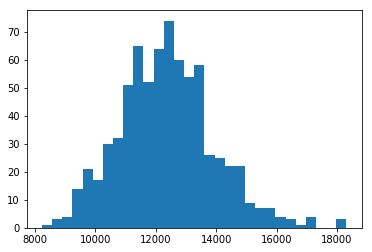

In [76]:

plt.hist(np.array(list(new_user_list.values())),bins=30)

In the above we could see that distribution is heavily tailed.Hence random sampling from a heavily tailed distribution would not give a better result.

(array([ 0.,  0.,  0.,  1.,  0.,  6.,  4.,  7., 13., 12., 13.,  4.,  5.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([120000., 122000., 124000., 126000., 128000., 130000., 132000.,
        134000., 136000., 138000., 140000., 142000., 144000., 146000.,
        148000., 150000., 152000., 154000., 156000., 158000., 160000.,
        162000., 164000., 166000., 168000., 170000., 172000., 174000.,
        176000., 178000., 180000.]),
 <a list of 30 Patch objects>)

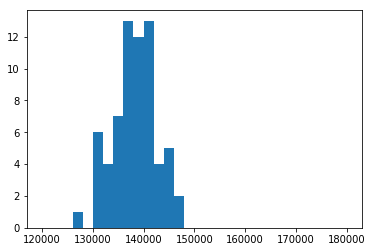

In [75]:
import matplotlib.pyplot as plt

plt.hist(np.array(list(new_user_dict.values())),bins=30,range=(120000,180000))

Distribution from user representative sampling